## Health_Insurance Cost_Prediction

#### Cost incurred for Healthcare is one of the major growing problems in the world, getting an insight about the costs before hand based on your health condition would be beneficial for the people & the industry.

#### We will be predicting cost based on a public dataset which considers the below factors,
* age	
* sex	
* bmi	
* children	
* smoker	
* region	
* charges

In [1]:
# import libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns 
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check if age, bmi, childern are in linear relation & find any outliers

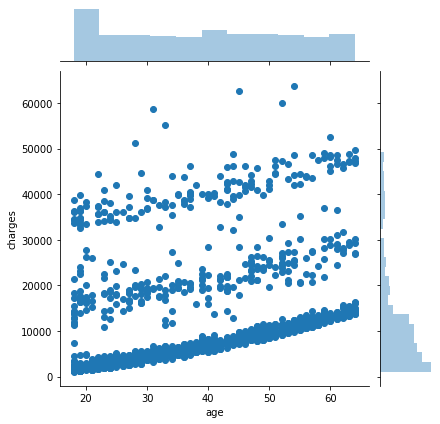

In [4]:
sns.jointplot(x='age', y='charges',data=df)

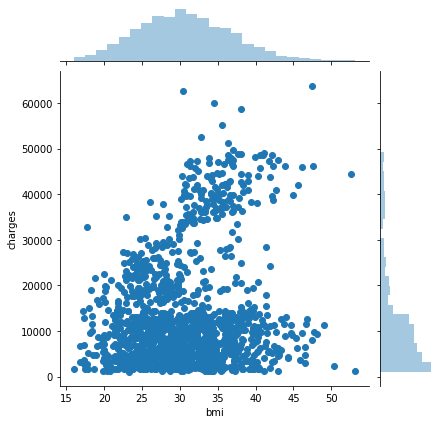

In [5]:
sns.jointplot(x='bmi', y='charges',data=df)

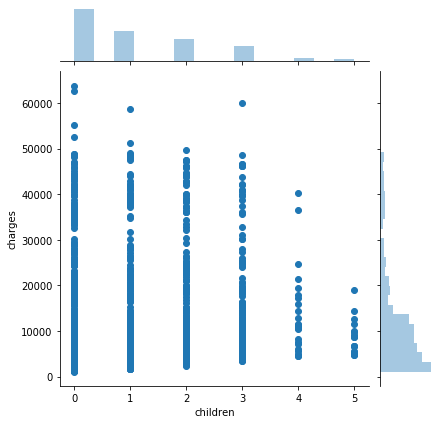

In [6]:
sns.jointplot(x='children', y='charges',data=df)

### To convert Categorical variables into numeric..

In [7]:
df['sex'] = pd.get_dummies(df['sex'])

In [8]:
df['smoker'] = pd.get_dummies(df['smoker'])

In [9]:
#To assign 4 different numeric values to regions, we use label encoding 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [11]:
x = df.drop('charges', axis=1)
y = df['charges']

### Using Statsmodels to get p, f-test values..

In [12]:
import statsmodels.api as sm

In [13]:
x_cons = sm.add_constant(x)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
x_cons.head()

,const,age,sex,bmi,children,smoker,region
0,1.0,19,1,27.900,0,0,3
1,1.0,18,0,33.770,1,1,2
2,1.0,28,0,33.000,3,1,2
3,1.0,33,0,22.705,0,1,1
4,1.0,32,0,28.880,0,1,1


In [15]:
x_sm = sm.OLS(y,x_cons).fit()

In [16]:
x_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:54:12   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.187e+04   1009.703     11.760      0.000    9893.088    1.39e+04
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex          131.1106    332.811      0.394      0.694    -521.780     784.001
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker     -2.382e+04    411.843    -57.839      0.000   -2.46e+04    -2.3e+04
region      -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can interpret from above statsmodel summary that,
* P >|t| value is greater than 0.05 for "sex" variable which means it will not have huge impact on the health insurance charges.
  But still we will include in our modeling since this dataset has less volume and columns.

### Test-Train split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


### 1. Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression().fit(x,y)

In [22]:
y_test_pred = lr.predict(x_test)

In [23]:
y_train_pred = lr.predict(x_train)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
r2_score(y_test, y_test_pred)

0.8012066600423947

In [26]:
r2_score(y_train, y_train_pred)

0.7366647054302722

### 2. Lasso

In [27]:
from sklearn.linear_model import Lasso

In [28]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)

In [29]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [30]:
lr_las = Lasso(alpha = 0.4)

In [31]:
lr_las.fit(x_train_s, y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
r2_score(y_test, lr_las.predict(x_test_s))

0.7998662953803359

### 3. Gradient Descent Regressor

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
lm_sgd = SGDRegressor()
lm_sgd

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
lm_sgd.fit(x_train_s, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [36]:
lm_sgd.coef_

array([ 3578.67471532,    21.74318501,  2050.732453  ,   581.14987702,
       -9553.24328787,  -275.0347838 ])

In [37]:
r2_score(y_test, lm_sgd.predict(x_test_s))

0.8000616891500232

### 4. Decision Tree Regressor

In [38]:
from sklearn import tree

In [41]:
regtree = tree.DecisionTreeRegressor()

In [42]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
y_train_pred = regtree.predict(x_train)

In [44]:
y_test_pred = regtree.predict(x_test)

In [45]:
mean_squared_error(y_test, y_test_pred)

55722948.663118064

In [48]:
r2_score(y_test, y_test_pred)

0.6498274250180585

In [47]:
r2_score(y_train, y_train_pred)

0.9982963931606104

### 5. Random Forrest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
regtree = tree.DecisionTreeRegressor()

In [51]:
rf_reg = RandomForestRegressor(n_estimators=50,n_jobs=-1 ,random_state=42)

In [52]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [53]:
mean_squared_error(y_test, rf_reg.predict(x_test))

20002514.628337093

In [54]:
r2_score(y_train, rf_reg.predict(x_train))

0.973065834704618

In [55]:
r2_score(y_test, rf_reg.predict(x_test))

0.8743007643787023

### 5. BOOSTING..

### Gradient Boosting..

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gbc_reg = GradientBoostingRegressor()

In [58]:
gbc_reg.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
r2_score(y_test, gbc_reg.predict(x_test))

0.898188479843152

In [65]:
r2_score(y_train, gbc_reg.predict(x_train))

0.897352642499688

### Ada Boosting..

In [60]:
from sklearn.ensemble import AdaBoostRegressor

In [61]:
ada_reg = AdaBoostRegressor(learning_rate = 0.02, n_estimators = 5000)

In [62]:
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.02, loss='linear',
                  n_estimators=5000, random_state=None)

In [63]:
r2_score(y_train, ada_reg.predict(x_train))

0.8307157138702301

In [64]:
r2_score(y_test, ada_reg.predict(x_test))

0.8681434293512558

### XGBoost

In [66]:
import xgboost as xgb

In [67]:
xgb_reg = xgb.XGBRegressor(max_depth = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

In [68]:
xgb_reg.fit(x_train, y_train)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/xgboost-0.90-py3.7.egg/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:41:01] WARNING: /tmp/xgboost-20191007-44032-1f3rb3e/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
r2_score(y_test, xgb_reg.predict(x_test))

0.8491340339857197

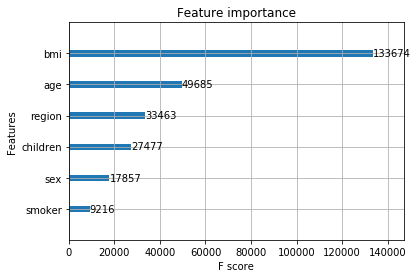

In [70]:
xgb.plot_importance(xgb_reg)

### Algorithm to be choosen..

From above various models, 
### Gradient Boosting ,
seems to be give better r2 score for test dataset. We will use this model in our application.